[**Challenge 0**](#Challenge-0)

[**Challenge 1**](#Challenge-1)

[**Challenge 2**](#Challenge-2)

[**Challenge 3**](#Challenge-3)

[**Challenge 4**](#Challenge-4)


# Challenge 0
To infinity and beyond 🚀

**(Warm-Up)**

A pizza delivery boy accidentally falls into a cryogenic chamber on New Years Eve, 1999, and is reanimated in the year 3000. 

At the time of his freezing, he had $0.93 in his bank account. Assuming an average 2.25\% interest rate compounded annually, how much money will he have in the bank when he wakes up?

Double check: https://www.youtube.com/watch?v=6JwkaLt9pf8

---

In [1]:
# warm-up

principal = 0.93
apr = 2.25 / 100
t = 1000

balance = principal * (1+apr)**t

print(f'With ${principal} in the bank and {apr:.2%} interest compounded annually over {t} years...')
print(f'... his balance will be ${balance:,.2f}.')

With $0.93 in the bank and 2.25% interest compounded annually over 1000 years...
... his balance will be $4,283,508,449.71.


**(Challenge)**

Suppose a mile is **1.609 km**, and the speed of light is **299,792,458 m/s** in a vacuum. The average distance between the Earth and the Sun is called an astronomical unit, or AU, which is about **92,955,807 miles**. How many **`astronomical units`** are there in a **`light-year`**?

<!-- Share your solution below! Remember to use

> ```python
> # your code here
> ```

to format your code nicely 👌

--- -->

In [2]:
# challenge

c_mps = 299_792_458    # m/s
mi_per_au = 92_955_807 # miles
km_per_mi = 1.609      # km / mile

c_kmps = c_mps / 1000             # km/s
km_per_au = mi_per_au * km_per_mi # km

# seconds in year: 365.25 days/year x 24 hr/day x 60 m/hr x 60 s/m
spy = 365.25 * 24 * 60 * 60 # s/year

lyr_km = c_kmps * spy # lyr in km

lyr_per_au = lyr_km / km_per_au # result

print('AU per light-year:', lyr_per_au)

AU per light-year: 63254.598047256135


# Challenge 1
999,999,997... 999,999,998... 999,999,999... ⌛

**(Warm-up)**

What is **`1000`** seconds in minutes and seconds? Print it in the format **`mm:ss`**.

---

In [3]:
# warm-up

t = 1000
print(t, "seconds is equal to", t//60, "m", t%60, "s")

1000 seconds is equal to 16 m 40 s


**(Challenge)**

One million seconds is equal to __11 days, 13 hours, 46 minutes and 40 seconds__ (according to quora).

Print **`one billion seconds`** in years, days, hours, minutes, and seconds.

<!-- Share your solution below! Remember to use

```python
# your code here
```


to format your code nicely 👌

--- -->

In [4]:
# challenge

t = 1e9

# modulo bases: amount of each unit before overflow
m_s = 60           # seconds
m_mi = 60          # minutes
m_hr = 24          # hours
m_dy = 365.25 / 12 # days in an average year
m_mo = 12          # months

# bases: seconds in each unit denom
b_mi = 60 
b_hr = b_mi * m_mi # s/hr : 60 * 60
b_dy = b_hr * m_hr # s/dy : 60 * 60 * 24
b_mo = b_dy * m_dy # s/mo : 60 * 60 * 24 * 365.25/12
b_yr = b_mo * m_mo # s/yr : 60 * 60 * 24 * 365.25/12 * 12

s = t % m_s
mi = int((t // b_mi) % m_mi)
hr = int((t // b_hr) % m_hr)
dy = int((t // b_dy) % m_dy)
mo = int((t // b_mo) % m_mo)
yr = int(t // b_yr)

print(yr, "years", mo, "months", dy, "days", hr, "hours", mi, "minutes" , s, "seconds")

31 years 8 months 7 days 1 hours 46 minutes 40.0 seconds


In [5]:
# solution robust to arbritrary time units and unit plurality
t = 1e9

# units [mod base, unit name singular, unit name plural]
mods = [[60, 'second', 'seconds'],
        [60, 'minute', 'minutes'],
        [24, 'hour', 'hours'],
        [365.25/12, 'day', 'days'],
        [12, 'month', 'months'],
        [100, 'year', 'years'],
        [10, 'century', 'centuries'],
        [1_000_000, 'millenium', 'millenia'],
        [None, 'eon', 'eons'] # none for unmodulated
       ]


# result and first base
msg, base = '', 1

# ensure last round (t % base) == t
mods[-1][0] = t + 1

for mod, sing_unit, plur_unit in mods:
    
    # calculate unit value (integer seconds per base modulated)
    val = int((t // base) % mod)

    # update base value
    base *= mod

    # time unit singular/plural with boolean multiplcation
    unit = sing_unit * (val <= 1) + plur_unit * (val > 1)
    
    # add to result string if unit value >= 1
    msg = (val >= 1) * f' {val} {unit}' + msg # use plural unit
    
print(msg)

 31 years 8 months 7 days 1 hour 46 minutes 40 seconds


# Challenge 2
To 1 or not to 1? 💀

**(Warm-up)**

Given a string that tells 24-hr time*, convert it to a string that tells 12-hr time.
```python
# for example, if
t_24h = "23:45"

# then your result should be
t_12h = # "11:45"

print (t_12h)
```
*Assume the hour is zero-padded, e.g. "01:00" instead of "1:00".

---

In [6]:
# warm-up
t_24h = "23:45"

# get string index of ":"
colon_index = t_24h.find(':')

# slice hour and set to integer
h_24 = int(t_24h[:colon_index])

# modulate over 12
h_12 = h_24 % 12

# add 12hr hour to minutes
t_12h = str(h_12) + t_24h[colon_index:]

# check if over 12: can also use boolean operator here
over_12 = h_24 // 12

# add pm / am if over 12
t_12h += ' pm' * over_12 + ' am' * (1 - over_12)

print(t_12h)

11:45 pm


**(Challenge)**

In base-10 or the decimal system, the number **10** is can be expressed as
> **10** = **1** (10) + **0** (1).

Similarly, in __binary__ or base-2 system, the decimal number **10** is written as
> __**1010**__ = **1** (8) + **0** (4) + **1** (2) + **0** (1).

Print the **`binary`** representation of the decimal number **`100`**.

<!-- Share your solution below! Remember to use 

> \```python
> # your code here
> \```

to format your code nicely :ok_hand:

--- -->

In [7]:
# challenge

# base-10 number
n = 10

# base
base = 2

p0 = (n // base**0) % base # base**0 place
p1 = (n // base**1) % base # base**1 place
p2 = (n // base**2) % base # base**2 place
p3 = (n // base**3) % base # base**3 place

# new base number
nb = f'{p3}{p2}{p1}{p0}'

print(nb)

1010


In [8]:
# robust to arbitrary n and base

n = 100
base = 2

# initiate total and exponent
total, power = 0, 0

# initiate result string
res = ''

while total < n:
        
    # place value of digit
    place_value = base**power
    
    # update exponent for next digit
    power += 1
    
    # digit
    digit = (n // place_value) % base
    
    # add total of digits so far in base-10
    total += digit * place_value
    
    # add string result to left
    res = str(digit) + res
    
print(res)

1100100


# Challenge 3

**(Warm-up)**

For any two numbers, calculate their **minimum, maximum, and absolute values**.

For example:
```python
# example numbers
x, y = -2, 1

# result values
minv == -2
maxv == 1
absx, absy == 2, 1
```
Try this both **with** and **without** the built-in python functions.

---

In [9]:
x, y = -2, 1

# with built-in functions

minv = min(x, y)
maxv = max(x, y)
absx, absy = abs(x), abs(y)

print('Built-in results:')
print(f'(x, y): \t {x, y}')
print(f'min(x, y): \t {minv}')
print(f'max(x, y): \t {maxv}')
print(f'abs(x, y): \t {absx, absy}')

print('-'*5)


# without built-in functions

# max/min
if x < y:
    minv = x
    maxv = y
else:
    minv = y
    maxv = x
    
# absolute vals
absx = x
if x < 0 :
    absx = -x
    
absy = y
if y < 0:
    absy = -y
    
print('From scratch results:')
print(f'(x, y): \t {x, y}')
print(f'min(x, y): \t {minv}')
print(f'max(x, y): \t {maxv}')
print(f'abs(x, y): \t {absx, absy}')

Built-in results:
(x, y): 	 (-2, 1)
min(x, y): 	 -2
max(x, y): 	 1
abs(x, y): 	 (2, 1)
-----
From scratch results:
(x, y): 	 (-2, 1)
min(x, y): 	 -2
max(x, y): 	 1
abs(x, y): 	 (2, 1)


In [10]:
# using lambda functions and conditional expressions
get_minv = lambda x, y: x if x < y else y
get_maxv = lambda x, y: x if x > y else y
get_absv = lambda x: x if x > 0 else -x

# test functions
x, y = -2, 1

print('Lambda function results:')
print(f'(x, y): \t {x, y}')
print(f'min(x, y): \t {get_minv(x, y)}')
print(f'max(x, y): \t {get_maxv(x, y)}')
print(f'abs(x, y): \t {get_absv(x), get_absv(y)}')

Lambda function results:
(x, y): 	 (-2, 1)
min(x, y): 	 -2
max(x, y): 	 1
abs(x, y): 	 (2, 1)


In [11]:
# even more generalized for multiple arguments
get_minv = lambda *args: sorted(args)[0]
get_maxv = lambda *args: sorted(args)[-1]

In [12]:
get_minv(-1, 2, -3)

-3

In [13]:
get_maxv(-1, 2, -3)

2

**(Challenge)**

Given two integers, check if one is a **factor** of the other (regardless of their order).

If one number is a factor of the other, print the **factor** and **cofactor** of the **product**. Otherwise, indicate that neither are factors of each other.

For example, the results can be presented like so:
```python
m, n = 5, 10
result == "5 and 2 are factors of 10."

m, n = 6, 2
result == "2 and 3 are factors of 6."

m, n = 2, 7
result == "2 and 7 are not factors of each other"
```
Are there special cases to watch out for? For an extra challenge, try to use as few **if statements** as possible.

---

In [14]:
# with conditional statements (if statements)
m, n = 2, 7

# check if either numbers are zero
if 0 in (m, n):
    print(f"{m} and {n} are not factors of each other.")
    
# check if factors
elif m % n == 0:

    # check which is bigger
    if m < n:
        print(f"{m} and {n/m:.0f} are factors of {n}.")
    
    else:
        print(f"{n} and {m/n:.0f} are factors of {m}.")
        
else:
    print(f"{m} and {n} are not factors of each other.")

2 and 7 are not factors of each other.


In [15]:
# with minimal conditional statements
m, n = 7, 0

# rearrange to make m <= n
m, n = sorted((m, n))

# message if m, n are not factors
msg_n = f"{m} and {n} are not factors of each other."
    
# check if either numbers are zero
if 0 in (m, n):
    print(msg_n)

else:
    
    # check if m is factor of n
    is_factor = m % n == 0
    
    # message if n, m are factors
    msg_y = f"{m} and {n / m:.0f} are factors of {n}."
    
    # message without if statement
    msg = is_factor * msg_y + (not is_factor) * msg_n

    print(msg)

0 and 7 are not factors of each other.


# Challenge 4

**(Warm-up)**

The following is a **truth table** showing the possible **truth-value** combinations of boolean variables `p` and `q` and certain operations:
```
|  p     |  q     |  p and q | p or q | not ((not p) or (not q)) | not ((not p) and (not q)) |
----------------------------------------------------------------------------------------------
|  True  |  True  |  True    |  True  |           ???            |            ???            |
|  True  |  False |  False   |  False |           ???            |            ???            |
|  False |  True  |  False   |  False |           ???            |            ???            |
|  False |  False |  False   |  False |           ???            |            ???            |
```

Recreate the truth table with the missing values filled in.

What's interesting about the columns?

In [2]:
header = '| p \t| q \t| p and q \t| p or q \t| not (not p or not q) \t| not (not p and not q) |'

print(header)

hline = "-" * 96

print(hline)

p, q = True, True
row = f'| {p}\t| {q}\t| {p and q}\t\t| {p or q}\t\t| {not (not p or not q)}\t\t\t| {not (not p and not q)}\t\t\t|'
print(row)

p, q = True, False
row = f'| {p}\t| {q}\t| {p and q}\t\t| {p or q}\t\t| {not (not p or not q)}\t\t\t| {not (not p and not q)}\t\t\t|'
print(row)

p, q = False, True
row = f'| {p}\t| {q}\t| {p and q}\t\t| {p or q}\t\t| {not (not p or not q)}\t\t\t| {not (not p and not q)}\t\t\t|'
print(row)

p, q = False, False
row = f'| {p}\t| {q}\t| {p and q}\t\t| {p or q}\t\t| {not (not p or not q)}\t\t\t| {not (not p and not q)}\t\t\t|'
print(row)

| p 	| q 	| p and q 	| p or q 	| not (not p or not q) 	| not (not p and not q) |
------------------------------------------------------------------------------------------------
| True	| True	| True		| True		| True			| True			|
| True	| False	| False		| True		| False			| True			|
| False	| True	| False		| True		| False			| True			|
| False	| False	| False		| False		| False			| False			|


In [4]:
# with loop

header = '| p \t| q \t| p and q \t| p or q \t| not (not p or not q) \t| not (not p and not q) |'

print(header)

hline = "-" * 96
print(hline)

tvals = (True, False)

for p in tvals:

    for q in tvals:
        
        # create row
        row = f'| {p}\t| {q}\t| {p and q}\t\t| {p or q}\t\t| ' + \
        f'{not (not p or not q)}\t\t\t| {not (not p and not q)}\t\t\t|'
        
        print(row)

| p 	| q 	| p and q 	| p or q 	| not (not p or not q) 	| not (not p and not q) |
------------------------------------------------------------------------------------------------
| True	| True	| True		| True		| True			| True			|
| True	| False	| False		| True		| False			| True			|
| False	| True	| False		| True		| False			| True			|
| False	| False	| False		| False		| False			| False			|


**(Challenge)**

The following is a `query response` from https://dictionaryapi.dev/, an English dictionary **API**:
```python
api_resp = [{"word" : "python",
             "phonetic" : "ˈpʌɪθ(ə)n",
             "phonetics" : [{"text" : "ˈpʌɪθ(ə)n",
                             "audio" : "//ssl.gstatic.com/dictionary/static/sounds/20200429/python--_gb_1.mp3"}],
             "origin" : "late 16th century (in the Greek sense) :  via Latin from Greek Puthōn, the name of a huge serpent killed by Apollo. The main current sense dates from the mid 19th century.",
             "meanings" : [{"partOfSpeech" : "noun",
                            "definitions" : [{"definition" : "a large heavy-bodied non-venomous snake occurring throughout the Old World tropics, killing prey by constriction and asphyxiation.",
                                              "synonyms" : [],
                                              "antonyms" : []},
                                             {"definition" : "a high-level general-purpose programming language.",
                                              "synonyms" : [],
                                              "antonyms" : []}]
                           }]
            }]
```
What are the **parts of speech** and **definitions** of "python" according to this English dictionary? Print the results from the above data structure.

For an extra challenge, write a program that prints all word definitions of such query results. Check your code against query entries for "coding": https://api.dictionaryapi.dev/api/v2/entries/en/coding.


In [5]:
api_resp = [{"word" : "python",
             "phonetic" : "ˈpʌɪθ(ə)n",
             "phonetics" : [{"text" : "ˈpʌɪθ(ə)n",
                             "audio" : "//ssl.gstatic.com/dictionary/static/sounds/20200429/python--_gb_1.mp3"}],
             "origin" : "late 16th century (in the Greek sense) :  via Latin from Greek Puthōn, the name of a huge serpent killed by Apollo. The main current sense dates from the mid 19th century.",
             "meanings" : [{"partOfSpeech" : "noun",
                            "definitions" : [{"definition" : "a large heavy-bodied non-venomous snake occurring throughout the Old World tropics, killing prey by constriction and asphyxiation.",
                                              "synonyms" : [],
                                              "antonyms" : []},
                                             {"definition" : "a high-level general-purpose programming language.",
                                              "synonyms" : [],
                                              "antonyms" : []}]
                           }]
            }]

In [6]:
meaning = api_resp[0]["meanings"][0]

partofspeech = meaning["partOfSpeech"]
definitions = meaning["definitions"]

def1 = definitions[0]['definition']
def2 = definitions[1]['definition']

print(f"1. Python ({partofspeech}): {def1}\n")
print(f"2. Python ({partofspeech}): {def2}\n")

1. Python (noun): a large heavy-bodied non-venomous snake occurring throughout the Old World tropics, killing prey by constriction and asphyxiation.

2. Python (noun): a high-level general-purpose programming language.



In [7]:
# entries for "coding" in dictionary
# https://api.dictionaryapi.dev/api/v2/entries/en/coding
entries = [{"word":"coding","phonetic":"ˈkəʊdɪŋ","phonetics":[{"text":"ˈkəʊdɪŋ","audio":"//ssl.gstatic.com/dictionary/static/sounds/20200429/coding--_gb_1.mp3"}],"meanings":[{"partOfSpeech":"noun","definitions":[{"definition":"the process of assigning a code to something for classification or identification.","example":"the forms are checked and returned to the census officer for coding","synonyms":[],"antonyms":[]},{"definition":"the process or activity of writing computer programs.","synonyms":[],"antonyms":[]},{"definition":"the process or fact of being the genetic code or determiner for an amino acid, protein, or characteristic.","synonyms":[],"antonyms":[]}]},{"partOfSpeech":"adjective","definitions":[{"definition":"functioning as the genetic code or determiner for an amino acid, protein, or characteristic.","example":"a coding region in human DNA","synonyms":[],"antonyms":[]}]}]}, {"word":"code","phonetic":"kəʊd","phonetics":[{"text":"kəʊd","audio":"//ssl.gstatic.com/dictionary/static/sounds/20200429/code--_gb_1.mp3"}],"origin":"Middle English: via Old French from Latin codex, codic- (see codex). The term originally denoted a systematic collection of statutes made by Justinian or another of the later Roman emperors; compare with code (sense 3 of the noun) (mid 18th century), the earliest modern sense.","meanings":[{"partOfSpeech":"verb","definitions":[{"definition":"convert (the words of a message) into a code so as to convey a secret meaning.","example":"only Mitch knew how to read the message—even the name was coded","synonyms":[],"antonyms":[]},{"definition":"write code for (a computer program).","example":"most developers code C + + like C","synonyms":[],"antonyms":[]},{"definition":"be the genetic code for (an amino acid or protein).","example":"genes that code for human growth hormone","synonyms":[],"antonyms":[]}]}]}]

In [8]:
n = 1

# get every entry
for entry in entries:
    
    word = entry['word']
    
    # get every meaning in entry
    for meaning in entry["meanings"]:
        
        partofspeech = meaning['partOfSpeech']
        definitions = meaning["definitions"]

        # get every definition
        for d in definitions:
            print(f"{n}. {word.title()} ({partofspeech}): {d['definition']}\n")
            n+=1

1. Coding (noun): the process of assigning a code to something for classification or identification.

2. Coding (noun): the process or activity of writing computer programs.

3. Coding (noun): the process or fact of being the genetic code or determiner for an amino acid, protein, or characteristic.

4. Coding (adjective): functioning as the genetic code or determiner for an amino acid, protein, or characteristic.

5. Code (verb): convert (the words of a message) into a code so as to convey a secret meaning.

6. Code (verb): write code for (a computer program).

7. Code (verb): be the genetic code for (an amino acid or protein).



# Challenge 5

**(Challenge)**

Find the most frequent `character` and `word` used in the **Zen of Python:**

```python
text = """The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""
```

In [37]:
text = """The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

In [38]:
# most frequent characters
char_count = [(c, text.count(c)) for c in set(text.lower())]
sorted(char_count, key=lambda x: x[1], reverse=True)

[(' ', 124),
 ('e', 90),
 ('t', 76),
 ('a', 50),
 ('i', 50),
 ('s', 43),
 ('o', 43),
 ('n', 40),
 ('l', 33),
 ('r', 32),
 ('h', 31),
 ('\n', 20),
 ('b', 20),
 ('p', 20),
 ('u', 20),
 ('.', 18),
 ('y', 17),
 ('m', 16),
 ('d', 16),
 ('c', 16),
 ('f', 11),
 ('g', 11),
 ('x', 6),
 ('-', 6),
 ('v', 5),
 (',', 4),
 ("'", 4),
 ('w', 4),
 ('*', 2),
 ('k', 2),
 ('!', 1),
 ('z', 0)]

In [39]:
# most frequent words
text = text.replace('\n', ' ').lower()
text = ''.join(c for c in text if (c.isalnum() or c == ' '))
words = text.split()

word_count = [(w, text.count(w)) for w in set(words)]
sorted(word_count, key=lambda x: x[1], reverse=True)

[('a', 53),
 ('be', 13),
 ('it', 10),
 ('is', 10),
 ('at', 9),
 ('better', 8),
 ('than', 8),
 ('the', 7),
 ('to', 5),
 ('in', 4),
 ('of', 4),
 ('one', 3),
 ('although', 3),
 ('if', 3),
 ('never', 3),
 ('idea', 3),
 ('explain', 2),
 ('complex', 2),
 ('unless', 2),
 ('obvious', 2),
 ('special', 2),
 ('may', 2),
 ('are', 2),
 ('way', 2),
 ('should', 2),
 ('do', 2),
 ('explicit', 2),
 ('implementation', 2),
 ('now', 2),
 ('ambiguity', 1),
 ('flat', 1),
 ('peters', 1),
 ('preferably', 1),
 ('that', 1),
 ('readability', 1),
 ('dutch', 1),
 ('often', 1),
 ('tim', 1),
 ('hard', 1),
 ('honking', 1),
 ('those', 1),
 ('cases', 1),
 ('errors', 1),
 ('by', 1),
 ('and', 1),
 ('easy', 1),
 ('beautiful', 1),
 ('arent', 1),
 ('pass', 1),
 ('zen', 1),
 ('not', 1),
 ('its', 1),
 ('ugly', 1),
 ('great', 1),
 ('purity', 1),
 ('only', 1),
 ('sparse', 1),
 ('implicit', 1),
 ('silenced', 1),
 ('guess', 1),
 ('more', 1),
 ('practicality', 1),
 ('lets', 1),
 ('refuse', 1),
 ('face', 1),
 ('break', 1),
 ('dense'

# Challenge n + 1
Rapping, rapping at my chamber door 🦉

**(Challenge)**

An acrostic poem is one where certain letters in each line forms a secret message. "A Valentine" by Edgar Allen Poe has a secret message formed by the 1st letter of the 1st line, the 2nd letter of the 2nd line, ..., n-th letter of n-th line.

Can you figure out who this poem is about?


In [23]:
# "A Valentine", a hidden acrostic by Edgar Allen Poe
# message key is the nth letter of the nth line
poem = """
For her this rhyme is penned, whose luminous eyes,
Brightly expressive as the twins of Loeda,
Shall find her own sweet name, that, nestling lies
Upon the page, enwrapped from every reader.
Search narrowly the lines!--they hold a treasure
Divine--a talisman--an amulet
That must be worn at heart. Search well the measure--
The words--the syllables! Do not forget
The trivialest point, or you may lose your labor!
And yet there is in this no Gordian knot
Which one might not undo without a sabre,
If one could merely comprehend the plot.
Enwritten upon the leaf where now are peering
Eyes scintillating soul, there lie perdus
Three eloquent words oft uttered in the hearing
Of poets, by poets--as the name is a poet’s, too.
Its letters, although naturally lying
Like the knight Pinto--Mendez Ferdinando--
Still form a synonym for Truth--Cease trying!
You will not read the riddle, though you do the best you can do.
"""

In [24]:
# challenge

# split lines
lines = poem.split('\n')

# remove empty beginning and ending lines
lines = lines[1:-1]

# initiate message
msg = ''

# for n-th line
for n, line in enumerate(lines):
    
    # filter alphabetical characters
    chars = [s for s in line if s.isalpha()]
    
    # add n-th character to message
    msg += chars[n]
    
print(msg)

Francessargentosgood


# Challenge n + 2

Autobots, roll out! 🤖

**(Warm-Up)**

<!-- \subsubsection*{(Warm-Up)} -->

Consider the equation:
\begin{align}
f(x) = \sqrt{1 - x^2}.
\end{align}

Compute the following summation:
\begin{align}
\sigma = \sum_{n=1}^{N}  f\left({n \over N}\right) {1 \over N}
\end{align}

for $N = 1000$. What is $4\sigma?$ What is $4\sigma$ if $N = 100,000?$

What's being computed here? Is there a way to achieve the goal more "effectively?"


In [25]:
# warm-up

# define n
N = 100_000

# define function
f = lambda x: (1-x**2)**(1/2)
dx = 1/N

# approximate integral
sigma = sum(f(n * dx) * dx for n in range(N))

# approximate pi
pi = 4*sigma

print(pi)

3.1416126164019564


**(Challenge)**

A *`prime number`** is a natural number greater than 1 whose only divisor is 1 and itself. Create a set or list of all primes less than or equal to any positive integer **`n`**.

How many primes are there **between 100 and 1,000**? How many **between 100,000 and 1,000,000**?

In [26]:
%%time
# challenge: brute-force method

primes = {2}

N = 1_000
for n in range(2, N+1):
    
    # if it's not divsible by any prime so far
    if not any(n % p == 0 for p in primes):
        
        # it's a prime
        primes.add(n)
        
# print(sorted(primes))

Wall time: 1.99 ms


In [27]:
%%time
# Sieve of Eratosthenes: uses memory to reduce computation

primes, nonprimes = set(), set()

N = 1_000_000

for n in range(2, N+1):
    
    # if n is not in the set of non-primes
    if n not in nonprimes:
        
        # it's a prime
        primes.add(n)
        
        # add all multiples to non-primes
        for m in range(n*2, N+1, n):
            nonprimes.add(m)
            
# print(sorted(primes))

Wall time: 562 ms


In [28]:
%%time
# "Lazy" method for Sieve of Erostophanes
# https://www.youtube.com/watch?v=5jwV3zxXc8E

def natural(n):
    '''
    yields natural numbers (recursive)
    
    parameters
    ---
    n : int
        the first number for the set
    '''
    yield n
    
    yield from natural(n+1)
    
def eros_sieve(s):
    '''
    yields primes (recursive)
    
    parameters
    ---
    s : generator (infinite set) of natural numbers
    '''
    n = next(s)
    yield n
    yield from eros_sieve(i for i in s if i%n != 0)
    

# get result
N = 1_000

primes = set()
s = eros_sieve(natural(2))

p = next(s) # generate first prime

while p <= N:
    primes.add(p)
    p = next(s) # generate next prime

print(sorted(primes))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
Wall time: 45.4 ms


# Challenge n

Given $x \in [0, 1]$, calculate the following functions:

\begin{align}
    f(x) &= \sqrt{\left|x\right|} + \sqrt{1-x^{2}} \\
    h(x) &= \sqrt{\left|x\right|} - \sqrt{1-x^{2}}
\end{align}

What does the function look like? Google (google **numpy** and **matplotlib.pyplot**).

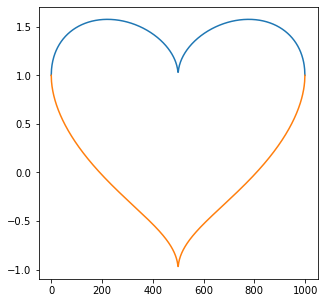

In [16]:
# upper function
f = lambda x: abs(x)**(1/2) + (1-x**2)**(1/2)

# lower function
h = lambda x: abs(x)**(1/2) - (1-x**2)**(1/2)

import matplotlib.pyplot as plt
import numpy as np

# linear vector
x = np.linspace(-1, 1, 1000)

# calc upper part
u = f(x)

# calc lower part
d = h(x)

# plot
plt.figure(figsize=(5, 5)) # set figure size

plt.plot(u)
plt.plot(d)
plt.show()

**(Warm-up)**

Approximate Euler's number $e$.

A few identities:
\begin{align}
    e^x &= \lim_{m \to \infty} \left(1+\frac{x}{m} \right)^m \\
    &= \sum_{n=0}^{\infty}\frac{x^n}{n!} = 1 + x + {x^2 \over 2} + {x^3 \over 2 \cdot 3} + {x^4 \over 2 \cdot 3 \cdot 4} + ...
\end{align}

In [17]:
%%time

m = 1e10
e = (1 + 1/m)**m
print('e ~=', e)

e ~= 2.7182820532347876
Wall time: 0 ns


In [18]:
%%time
# using Taylor approximation
n = 10_000

e = 0
fac = 1

for i in range(n):
    
    e += 1/fac
    
    fac *= (i+1)
    
    
print(f'e ~= {e:,}')

e ~= 2.7182818284590455
Wall time: 27 ms


**(Challenge)**

Create a function called **`ln(x, d=10)`** that takes an numeric argument **`x`** and default integer argument **`d=10`.** The function should return an approximation of $\ln(x) = \log_e(x)$ accurate to `d` decimals.

Taylor expansion of $\ln(x)$ around $a$:
$$\begin{align}
    \ln(x) &= \ln(a) + \sum_{n=1}^{\infty} \frac{(-1)^{n-1} a^{-n}(x-a)^n}{n!} \\
    &= \ln(a) + a^{-1}(x-a) - \frac{a^{-2}(x-a)^2}{2} + \frac{a^{-3}(x-a)^3}{2 \cdot 3} + ...
\end{align}$$

In [19]:
%%time

x = 3

# approximate around a = 1
res = 0
factorial = 1

for n in range(1, 100_000):
    
    factorial *= n
    
    res += (-1)**(n-1) * (x-1)**n / factorial
    
print(res)

0.8646647167633875
Wall time: 15.6 s


**(Warm-up)**

Python has a in-built function called `sum()` which can take a list or tuple and sum all the values. Create a function called **`prod()`** which takes a list or tuple of numbers and returns their product.

In [20]:
def prod(iterable):
    '''
    Return product of elements in the iterable.
    '''
    # seed with multiplicative identity
    res = 1
    
    # iterate through iterable
    for x in iterable:
        res *= x
        
    # return product
    return res

print(prod([1, 2, 3]))

ten_factorial = prod([i for i in range(1, 10)])
print(ten_factorial)

6
362880


# Challenge n

**(Warm-up)**

Consider a triangle where each layer is constructed with numbers from 0 to 9:

```
0
11
222
3333
 ⋮
9999999999
00000000000
111111111111
```

Print such a triangle with 20 layers.

**(Challenge)**

Wiki: https://en.wikipedia.org/wiki/Pascal%27s_triangle

Pascal's Triangle is a pyramid of numbers constructed as follows:
```
      1
     1 1
    1 2 1
   1 3 3 1
  1 4 6 4 1
      ⋮
```
Where the numbers in each level is constructed by the sum of the numbers standing on its shoulders from the level above.

For example, the 5th row of the triangle `1 4 6 4 1` is constructed as follows:
```
              1
           1     1
        1     2     1
     1     3     3     1
(0+1) (1+3) (3+3) (3+1) (1+0) => 1 4 6 4 1
```
Create a list of lists that contain the first **`20 rows`** of Pascal's Triangle.

**i.e.:**
```python
pascal == [[1],
           [1, 1],
           [1, 2, 1],
           [1, 3, 3, 1],
           [1, 4, 6, 4, 1],
              ⋮
          ]
```

In [21]:
# solution 1: using indexing

pascal = [[1]]

while len(pascal) < 20:

    prev = pascal[-1]
    
    # add 0 + first
    row = [prev[0]]
    
    # add left and right from interior numbers
    for L, R in zip(prev[:-1], prev[1:]):
        row.append(L+R)
        
    # add last + 0
    row.append(prev[-1])
    
    pascal.append(row)

# function to print
def pprint(list_of_list):
    rep = str(list_of_list).replace('],', '],\n')
    print(rep)
    
pprint(pascal)

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1],
 [1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1],
 [1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1],
 [1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1],
 [1, 14, 91, 364, 1001, 2002, 3003, 3432, 3003, 2002, 1001, 364, 91, 14, 1],
 [1, 15, 105, 455, 1365, 3003, 5005, 6435, 6435, 5005, 3003, 1365, 455, 105, 15, 1],
 [1, 16, 120, 560, 1820, 4368, 8008, 11440, 12870, 11440, 8008, 4368, 1820, 560, 120, 16, 1],
 [1, 17, 136, 680, 2380, 6188, 12376, 19448, 24310, 24310, 19448, 12376, 6188, 2380, 680, 136, 17, 1],
 [1, 18, 153, 816, 3060, 8568, 18564, 31824, 43758, 48620, 43758, 31824, 18564, 8568, 3060, 816, 153, 18, 1],
 [1, 19, 171, 969, 3876, 11628, 27132, 50388, 75582, 92378, 92378, 75582, 50388,

In [22]:
# solution 2: using binomial theorem - https://en.wikipedia.org/wiki/Binomial_theorem

# fast factorial with memoization
_fac = [1]
def factorial(n):
    '''
    Compute factorial using memoization
    '''
    # while factorials not computed
    while n >= (m:=len(_fac)):
        _fac.append(m * _fac[-1])
        
    return _fac[n]

# binomial coefficient: https://en.wikipedia.org/wiki/Binomial_coefficient
def binom_coeff(n, k):
    '''
    Compute n choose k
    '''
    return int(factorial(n) / (factorial(n-k) * factorial(k)))

# create pascal
pascal = []
for n in range(20):
    
    row = []
    for k in range(n+1):
        # add binomial coefficients
        row.append(binom_coeff(n, k))
        
    pascal.append(row)
    
print(str(pascal).replace('],', '],\n'))

[[1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1],
 [1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1],
 [1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1],
 [1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1],
 [1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1],
 [1, 14, 91, 364, 1001, 2002, 3003, 3432, 3003, 2002, 1001, 364, 91, 14, 1],
 [1, 15, 105, 455, 1365, 3003, 5005, 6435, 6435, 5005, 3003, 1365, 455, 105, 15, 1],
 [1, 16, 120, 560, 1820, 4368, 8008, 11440, 12870, 11440, 8008, 4368, 1820, 560, 120, 16, 1],
 [1, 17, 136, 680, 2380, 6188, 12376, 19448, 24310, 24310, 19448, 12376, 6188, 2380, 680, 136, 17, 1],
 [1, 18, 153, 816, 3060, 8568, 18564, 31824, 43758, 48620, 43758, 31824, 18564, 8568, 3060, 816, 153, 18, 1],
 [1, 19, 171, 969, 3876, 11628, 27132, 50388, 75582, 92378, 92378, 75582, 50388,

# Challenge n + 3

**(Warm-up)**

Create a list of numbers **`from 1 to 20`** in order where each number `n` is repeated `n` times.

**i.e.: `x = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, ....]`**.

Bonus points for using a list comprehension.

In [29]:
# warm-up
n = 20

x = [i for i in range(n+1) for _ in range(i)]

print(x)

[1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


**(Challenge)**
    
A look-and-say number sequence is generated mnemonically. If we start with the number **`1`** in the sequence:

**`1`** reads `One "one"` => **`11`**, which are now the next numbers in the sequence.

**`11`** reads `Two "ones"` => **`21`**, 

**`21`** reads `One "two", one "one"` => **`1211`**,

**`1211`** reads `One "one", one "two", two "ones"` => **`111221`**,

**`111221`** reads `Three "ones", two "twos", one "one"` => **`312211`** ...

... and so on.

Create a `look-and-say` sequence as a list of **length 30** that begins with **1.**

**i.e.:**

```python
result == [1,
           11,
           21,
           1211,
           111221,
           312211,
             ⋮
          ]
```

John Conway's explanation of Look-and-Say Numbers: https://youtu.be/ea7lJkEhytA

# Challenge n + 4

**(Warm-up)**

Without any imports, create a function **`vec_mult()`** that takes two lists and returns their vector dot product.

```python
def vec_mult(vec1, vec2):
    # your code here
    return res

x = [1, 2, 3]
y = [4, 5, 6]

z = vec_mult(x, y)
print(z)
```

In [30]:
# warm-up

def vec_mult(vec1, vec2):
    
    res = sum(a * b for a, b in zip(vec1, vec2))
    
    return res

x = [1, 2, 3]
y = [4, 5, 6]

z = vec_mult(x, y)
print(z)

32


**(Challenge)**

Let a list of numbers represent a row vector. Let a list of row vectors represent a matrix. I've made a function `mprint` to print the matrix representation.

Without using imports:

1. Create a function called **`transpose()`** that takes a matrix and returns its transpose.

2. Create a function called **`mat_mult()`** that takes two matrices and returns their dot product.

Check your results with numpy.

```python
def transpose(X):
    # your code here
    return

def mat_mult(X, Y):
    # your code here  
    return

def mprint(M, *args, **kwargs):
    '''
    Quick print list M as matrix
    '''
    mat_rep = str(M).replace('],', '],\n')
    print(mat_rep, *args, **kwargs)
    
# test cases
X = [[1, 2],
     [3, 4],
     [5, 6]]

Y = transpose(X)
Z = mat_mult(X, Y)

mprint(X, '\n')
mprint(Y, '\n')
mprint(Z)
```

In [31]:
# challenge

def transpose(X):

    Y = [[0 for _ in X] for _ in X[0]]

    for i, xrow in enumerate(X):
        
        for j, v in enumerate(xrow):
        
            Y[j][i] = v

    return Y

def mat_mult(X, Y):
    
    # convert column vector to "row vector"
    YT = transpose(Y)
    
    Z = [[0 for _ in Y[0]] for _ in X]
    
    # for row vector in x
    for i, x in enumerate(X):
        
        # for column vector in Y (row vector in Y.T)
        for j, y in enumerate(YT):
            
            Z[i][j] = vec_mult(x, y)
            
    return Z

def mprint(M, *args, **kwargs):
    '''
    Quick print list M as matrix
    '''
    mat_rep = str(M).replace('],', '],\n')
    print(mat_rep, *args, **kwargs)

# test case
X = [[1, 2],
     [3, 4],
     [5, 6]]

Y = transpose(X)
Z = mat_mult(X, Y)

mprint(X, '\n')
mprint(Y, '\n')
mprint(Z)

[[1, 2],
 [3, 4],
 [5, 6]] 

[[1, 3, 5],
 [2, 4, 6]] 

[[5, 11, 17],
 [11, 25, 39],
 [17, 39, 61]]


http://www.pyschools.com/quiz/view_question/s3-q13

In [16]:
def tictactoe(moves): 

    def checkline(line, label):
        xo = list(set(line))
        if len(xo) < 2:
            return "'%s' wins (%s)." % (xo[0], label)
        else:
            return False

    n = len(moves)
    lines = {'horizontal' : moves,
             'vertical'   : [[moves[i][j] for i in range(n)] for j in range(n)],
             'diagonal'   : [[row[i] for i, row in enumerate(moves)],
                 [row[-i-1] for i, row in enumerate(moves)]]
        }

    for label, data in lines.items():
        for line in data:
            res = checkline(line, label)
            if res:
                return res
    return "Draw."

tictactoe([('X', ' ', 'O'), 
           (' ', 'O', 'O'), 
           ('X', 'X', 'X') ])

"'X' wins (horizontal)."

In [21]:
moves  =  ([('X', ' ', 'O'), 
           (' ', 'O', 'O'), 
           ('X', 'X', 'X') ])
"'X' wins (horizontal)."
print(moves)
print(tictactoe(moves))

moves  =  ([('X', 'O', 'X'), 
           ('O', 'X', 'O'), 
           ('O', 'X', 'O') ])
'Draw.'
print(moves)
print(tictactoe(moves))

moves  =  ([('X', 'O', 'O'), 
           ('X', 'O', ' '), 
           ('O', 'X', ' ') ])
"'O' wins (diagonal)."
print(moves)
print(tictactoe(moves))

moves  =  ([('X', 'O', 'X'), 
           ('O', 'O', 'X'), 
           ('O', 'X', 'X') ])
"'X' wins (vertical)."
print(moves)
print(tictactoe(moves))

[('X', ' ', 'O'), (' ', 'O', 'O'), ('X', 'X', 'X')]
'X' wins (horizontal).
[('X', 'O', 'X'), ('O', 'X', 'O'), ('O', 'X', 'O')]
Draw.
[('X', 'O', 'O'), ('X', 'O', ' '), ('O', 'X', ' ')]
'O' wins (diagonal).
[('X', 'O', 'X'), ('O', 'O', 'X'), ('O', 'X', 'X')]
'X' wins (vertical).


In [539]:
import time
import matplotlib.pyplot as plt
import numpy as np
import math

0.5034


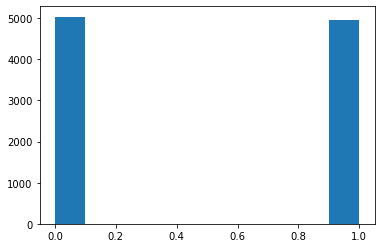

In [569]:
# create random coin flip

def flip_coin():
    '''
    Return 1 or 0 with prob 0.5
    '''
    for i in range(1000):
        t = time.perf_counter_ns()
        v = int(str(t)[-3])

        if v % 2:
            return 1
        else:
            return 0
        
samples = [flip_coin() for _ in range(10_000)]
print(samples.count(0) / len(samples))

plt.hist(samples)
plt.show()

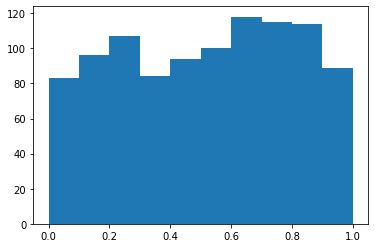

In [595]:
# uniform distribution

def uniform(a, b):
    
    binary_dec_values = [flip_coin() * (2**(-n)) for n in range(1, 201)]
    rv = sum(binary_dec_values)
    
    span = b - a
    rv = rv * span + a
    
    return val

samples = [uniform(0, 1) for _ in range(1000)]

plt.hist(samples)
plt.show()

0.3094


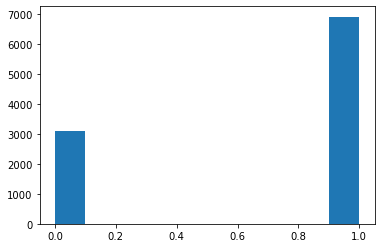

In [596]:
# bernoulli distribution

def bern(p):
    
    rv = int(uniform(0, 1) >= p)
    return rv

samples = [bern(0.3) for _ in range(10_000)]
print(samples.count(0) / len(samples))

plt.hist(samples)
plt.show()

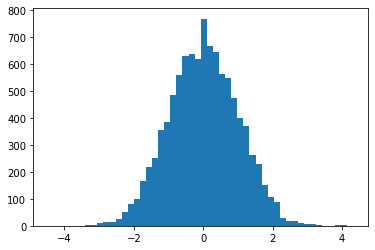

In [637]:
def normal(mean=0, stdev=1):

    # radius
    r = math.sqrt(-2*math.log(uniform(0, 1)))
    
    # angle
    theta = uniform(0, 2*math.pi)
    
    # construct standard normal value
    rv = r * math.sin(theta)
    
    # adjust for mean and scale (standard deviation)
    rv = (rv * stdev) + mean
    
    return rv

samples = [normal() for _ in range(10_000)]
plt.hist(samples, bins=50)
plt.show()